In [0]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

In [25]:
my_data = pd.read_csv("drug200.csv", delimiter=',')
print(my_data.count())
my_data[0:5]

Age            200
Sex            200
BP             200
Cholesterol    200
Na_to_K        200
Drug           200
dtype: int64


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [37]:
#Changing into numpy array
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:10]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607000000000001],
       [49, 'F', 'NORMAL', 'HIGH', 16.275],
       [41, 'M', 'LOW', 'HIGH', 11.037],
       [60, 'M', 'NORMAL', 'HIGH', 15.171],
       [43, 'M', 'LOW', 'NORMAL', 19.368]], dtype=object)

In [38]:
#some features in this dataset are categorical such as Sex or BP. 
#nfortunately, Sklearn Decision Trees do not handle categorical variables. 
#But still we can convert these features to numerical values


from sklearn import preprocessing

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])

le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW','NORMAL','HIGH'])
X[:,2] = le_BP.transform(X[:,2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]



array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [41]:
y = my_data["Drug"].values
y[0:5]

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY'], dtype=object)

In [45]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=1)

print(X_test.shape)
print(y_test.shape)

(60, 5)
(60,)


In [48]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [51]:
#prediction
predTree = drugTree.predict(X_test)

print (predTree [0:5])
print (y_test [0:5])

['drugX' 'drugY' 'drugX' 'drugC' 'drugY']
['drugX' 'drugY' 'drugX' 'drugC' 'drugY']


In [53]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9666666666666667


In [60]:
#accuracy without library
msk= predTree==y_test
print(msk)
x_tmp=msk[msk]
print(x_tmp)
print(len(x_tmp)/len(msk))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True False]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
0.9666666666666667


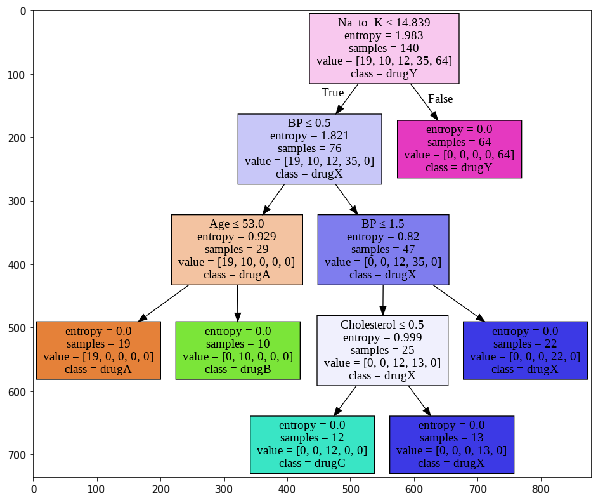

In [63]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 


dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(10, 20))
plt.imshow(img,interpolation='nearest')